In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, ggdist)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Plotting_functions.R")

In [4]:
baseraincloud_plot.fx <- function(mydf, yvar, xvar, fillvar, colpal, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2, adjustslab= 0.5, binwidth. = unit(0.01, "npc") ) {
    p0 <- ggplot(data = mydf, aes(x = eval(parse(text = xvar)), y = eval(parse(text = yvar)), fill = eval(parse(text = fillvar))))  +
    geom_dots(side = "left", scale = scaledots, justification = justdots, color = "transparent", overlaps = "nudge", binwidth = binwidth.) +
        stat_slab(scale = scaleslab, adjust = adjustslab, justification = justslab) +
        geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.5) +
        scale_fill_manual(values = colpal) +
        myaxis +
        myplot +
        theme(legend.position = "none") + scale_y_continuous(limits = c(0, 110), breaks = c(0, 25, 50, 75, 100)) +
        labs(x = "", y = gsub("`", "", yvar))
    return(p0)
}


# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
table(meta_div$Patient[meta_div$Disease_type == "NB"])


CHP_346 CHP_379 CHP_385 CHP_418 
      5       6       9       8 

In [9]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [10]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

Exclude T-ALLs

In [11]:
table(meta_div$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                370                 136                 273                  44 

In [12]:
meta_div <- meta_div[ meta_div$cancergroup != "T-cell malignancies", ]

In [13]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [14]:
dim(pbmc)

[1] 505  66

In [15]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

## Rainclouds across groups

In [16]:
pbmc_01 <- pbmc[pbmc$cycle == "X01",]

In [17]:
pbmc_01[ pbmc_01$Disease_type == "OS", c("PD1%", "CM%","Naïve%","TE%","SCM%","EM%", "sample_id")]

,PD1%,CM%,Naïve%,TE%,SCM%,EM%,sample_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
443,5.422222,24.4444444,26.31111,38.044444,8.7111111,2.4888889,CHP_348_01
513,8.075532,37.7259944,22.61953,34.471675,0.5624749,4.6203294,CHP_362_01
523,12.567399,7.4243053,47.61510,42.845292,0.7465782,1.3687267,CHP_364_01
746,12.803738,15.6074766,39.34579,21.635514,7.6168224,15.7943925,CHP_408_01
353,4.636849,2.6672138,12.92573,75.748872,7.6733689,0.9848174,CHP_330_01
653,47.666254,0.6195787,37.33994,6.691450,55.1425031,0.2065262,CHP_390_01
668,19.665072,22.0574163,47.94258,9.904306,17.9425837,2.1531100,CHP_393_01
866,15.575304,14.8737138,45.50982,33.582788,5.3320861,0.7015903,CHP_432_01


Naive

In [20]:
dim(pbmc_01)

[1] 61 66

In [21]:
p0 <- baseraincloud_plot.fx(pbmc_01, "`Naïve%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 2 )  
#0.5,1.2,0.5,-0.2,0.5, NA) 

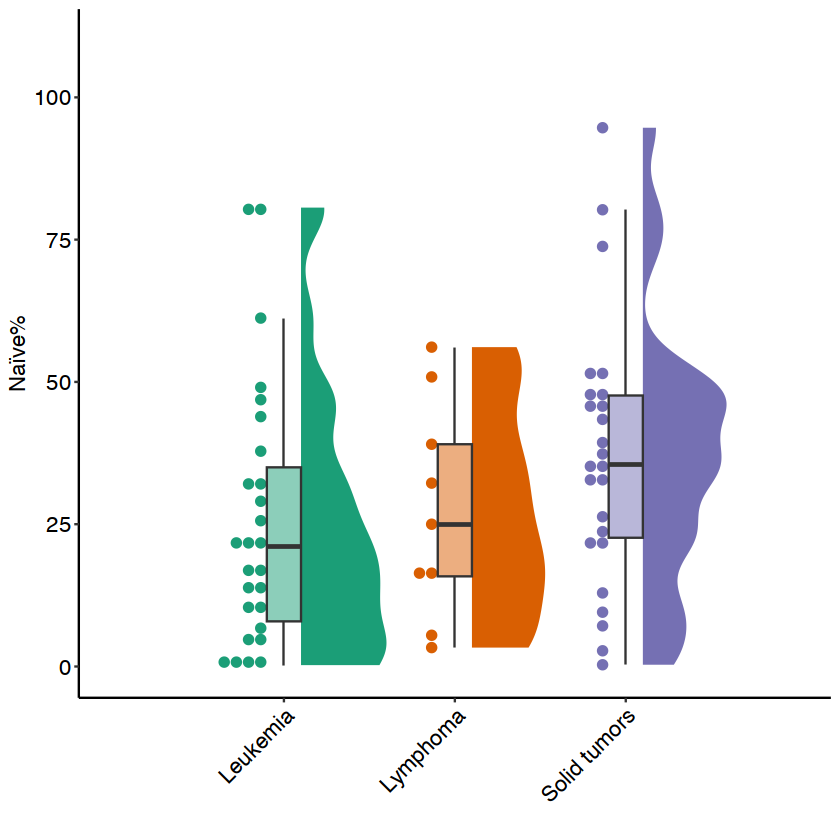

In [22]:
p0

In [23]:
tapply(pbmc_01$`Naïve%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2445  7.9314 21.1640 25.3577 34.9947 80.6271 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.322  15.839  25.000  27.209  39.053  56.111 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3055 22.6195 35.5740 36.8239 47.6151 94.6625 


In [24]:
mytest <- "Naïve%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value


	Exact two-sample Kolmogorov-Smirnov test

data:  pbmc_01[[mytest]][which(pbmc_01$cancergroup == "Solid tumors")] and pbmc_01[[mytest]][which(pbmc_01$cancergroup == "Leukemia")]
D = 0.35259, p-value = 0.05781
alternative hypothesis: two-sided


[1] 0.05781055

[1] 0.6322416

[1] 0.9666134

In [25]:
mypval <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [26]:
mypval <- round_and_format(mypval)

In [27]:
mypval

[1] "0.06"

In [28]:
p0_stat <- p0 + geom_signif(
    y_position = 100, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("Naïve%") ))

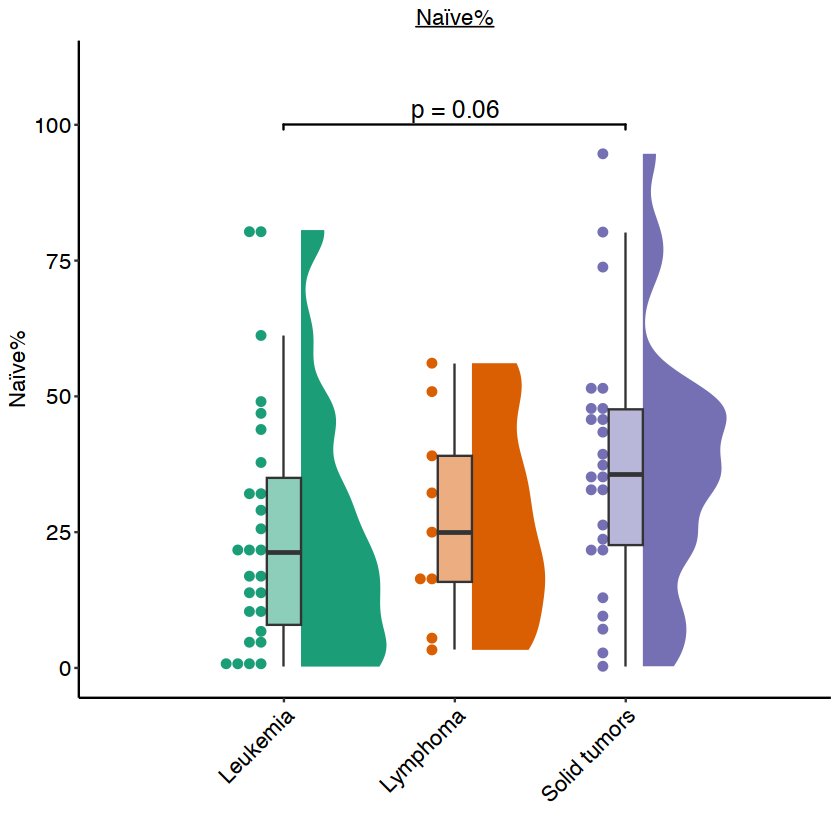

In [29]:
p0_stat

In [30]:
# pdf(paste0(plotpath, "rainclouds_Naive_X01.pdf"), width = 4, height = 6)
# p0_stat
# dev.off()

CM

In [31]:
p1 <- baseraincloud_plot.fx(pbmc_01, "`CM%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 2 )  

Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


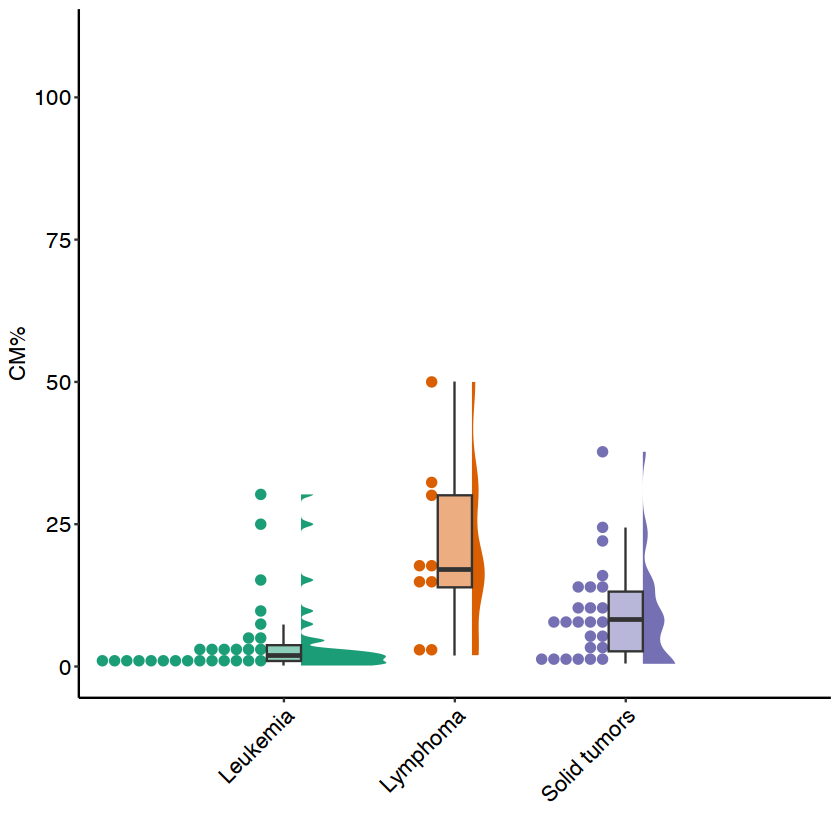

In [32]:
p1

In [33]:
mytest <- "CM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.002145412

[1] 0.002806573

[1] 0.01374469

In [34]:
mypval1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [35]:
mypval1
mypval2
mypval3

[1] 0.002145412

[1] 0.002806573

[1] 0.01374469

In [36]:
tapply(pbmc_01$`CM%`, pbmc_01$Disease_type, summary, na.rm = T)

$ALL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667  0.9390  2.1885  4.1486  3.0363 25.0000 

$AML
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.426   1.768   2.766   5.168   4.685  15.195 

$ARMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.18   11.18   11.18   11.18   11.18   11.18 

$BL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.85   24.10   32.35   32.73   41.17   50.00 

$CML
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.303   9.287  16.271  16.271  23.254  30.238 

$DLBCL
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.983   6.070  10.158  10.158  14.246  18.333 

$ERMS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.105   5.146   8.186   8.021  10.979  13.772 

$EWS
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4804  4.7722  5.4561  5.4881  8.3053  8.4263 

$HB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.41    4.41    4.41    4.41    4.41    4.41 

$HD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.08  

In [37]:
tapply(pbmc_01$`CM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1667  0.9662  2.0157  4.6864  3.7482 30.2376 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.983  13.910  17.084  20.387  30.082  50.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4804  2.6672  8.1863  9.3959 13.1579 37.7260 


In [38]:
mypval1 <- round_and_format(mypval1)
mypval2 <- round_and_format(mypval2)
mypval3 <- round_and_format(mypval3)

In [39]:
p1_stat <- p1 + geom_signif(
    y_position = c(75, 100, 85), xmin = c(1,1,2), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval2), paste0("p = ",mypval1), paste0("p = ", mypval3)), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("CM%") ))

Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


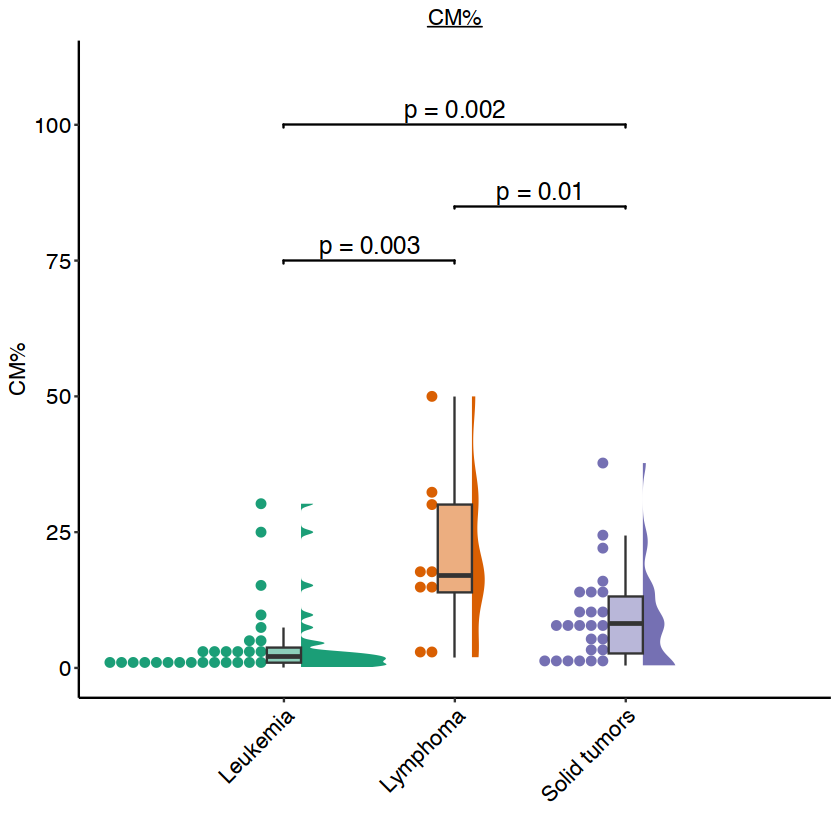

In [40]:
p1_stat

TE

In [41]:
p2 <- baseraincloud_plot.fx(pbmc_01, "`TE%`", "cancergroup", "cancergroup", group_col, 
# scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA)  
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 2 )  

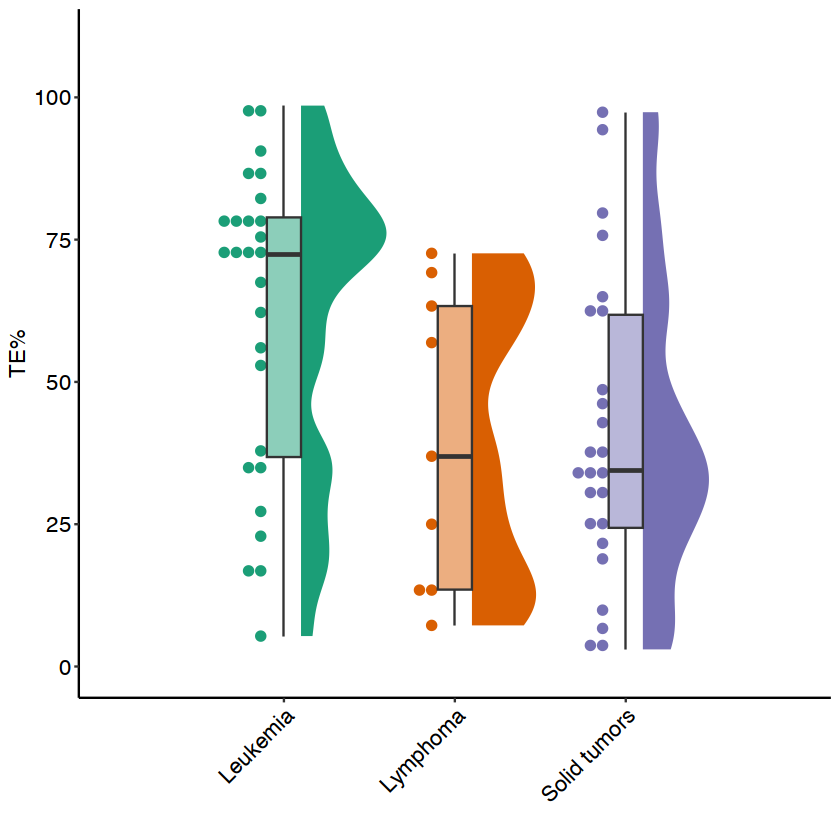

In [42]:
p2

In [43]:
mytest <- "TE%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.009475695

[1] 0.07249461

[1] 0.9620629

In [44]:
mypval3 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [45]:
mypval3 <- round_and_format(mypval3)

In [46]:
tapply(pbmc_01$`TE%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.343  36.803  72.391  61.357  78.908  98.550 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.222  13.511  36.944  39.784  63.333  72.595 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.008  24.360  34.472  41.104  61.797  97.386 


In [47]:
p2_stat <- p2 + geom_signif(
    y_position = 105, xmin = 1, xmax = 3,
    annotation = paste0("p = ",mypval3), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TE%") ))

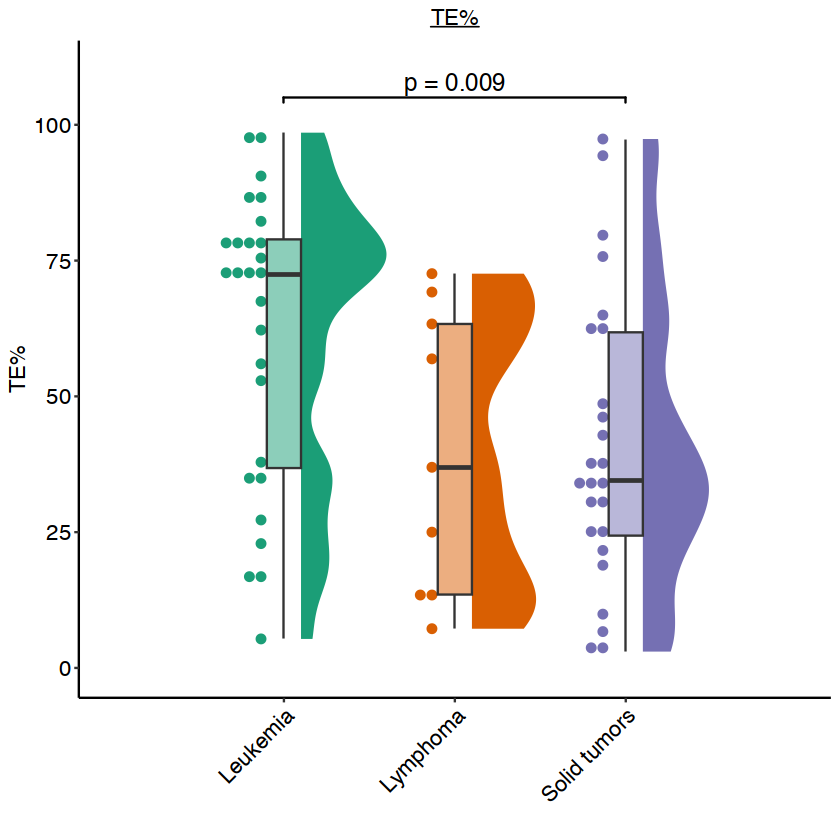

In [48]:
p2_stat

SCM

In [49]:
p_scm <- baseraincloud_plot.fx(pbmc_01, "`SCM%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA) 

In [50]:
# p_scm + scale_x_discrete(expand = c(0.5,0.5))

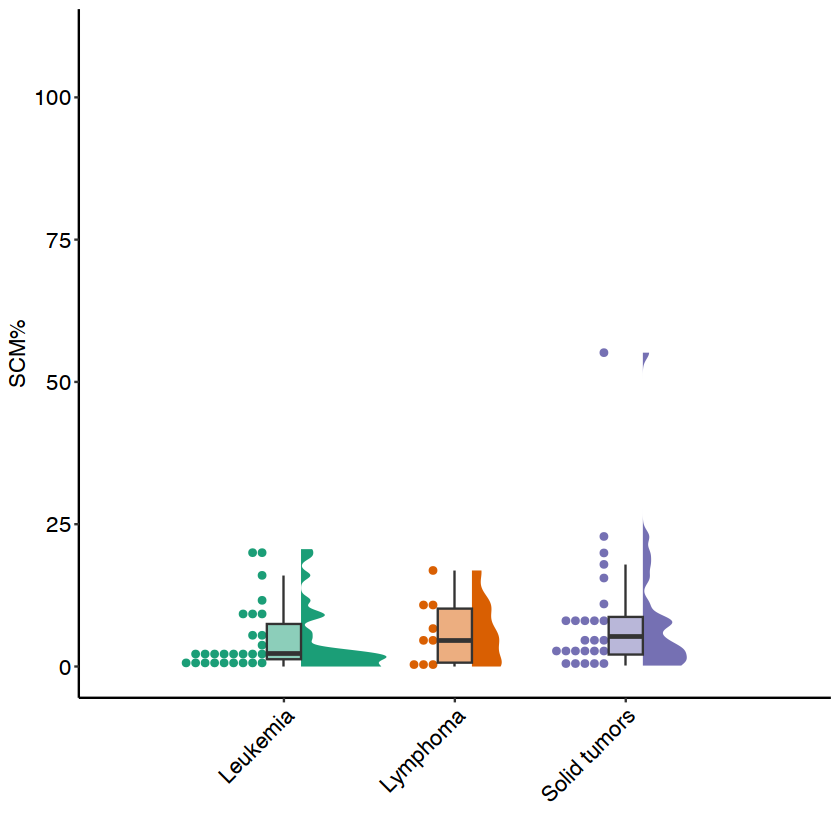

In [51]:
p_scm

In [52]:
tapply(pbmc_01$`SCM%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.275   2.230   4.862   7.475  20.623 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.676   4.615   6.113  10.173  16.875 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.157   2.103   5.185   8.630   8.711  55.142 


In [53]:
mytest <- "SCM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.06549631

[1] 0.6816659

[1] 0.4041996

In [54]:
# p0_stat <- p0 + geom_signif(
#     y_position = 100, xmin = 1, xmax = 3,
#     annotation = paste0("p = ",mypval), tip_length = 0.01, textsize = 5
#   ) + ggtitle(expression(underline("Naïve%") ))

In [55]:
p_scm <- p_scm + ggtitle(expression(underline("SCM%") ))

EM

In [56]:
p_em <- baseraincloud_plot.fx(pbmc_01, "`EM%`", "cancergroup", "cancergroup", group_col,
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = NA ) 

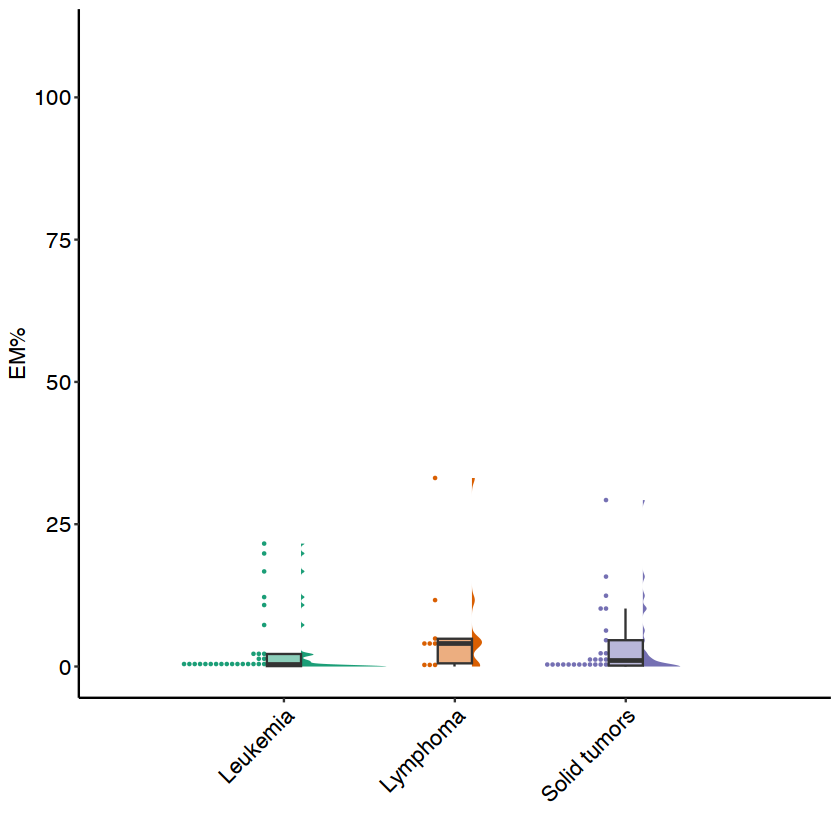

In [57]:
p_em 

In [58]:
table(pbmc_01$cancergroup)


    Leukemia     Lymphoma Solid tumors 
          27            9           25 

In [59]:
tapply(pbmc_01$`EM%`, pbmc_01$cancergroup, summary)

$Leukemia
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.07014  0.40000  3.73754  2.20086 21.59827 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5556  4.0570  6.9290  4.8780 33.1230 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1595  0.9848  4.0458  4.6203 29.2449 


In [60]:
mytest <- "EM%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.3524996

[1] 0.2125052

[1] 0.1186999

In [61]:
mypval_em <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [62]:
mypval_em <- round_and_format(mypval_em)

In [63]:
mypval_em

[1] "0.4"

In [64]:
p_em <- p_em + ggtitle(expression(underline("EM%") ))


PD1

In [66]:
p3 <- baseraincloud_plot.fx(pbmc_01, "`PD1%`", "cancergroup", "cancergroup", group_col,
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = NA)  

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


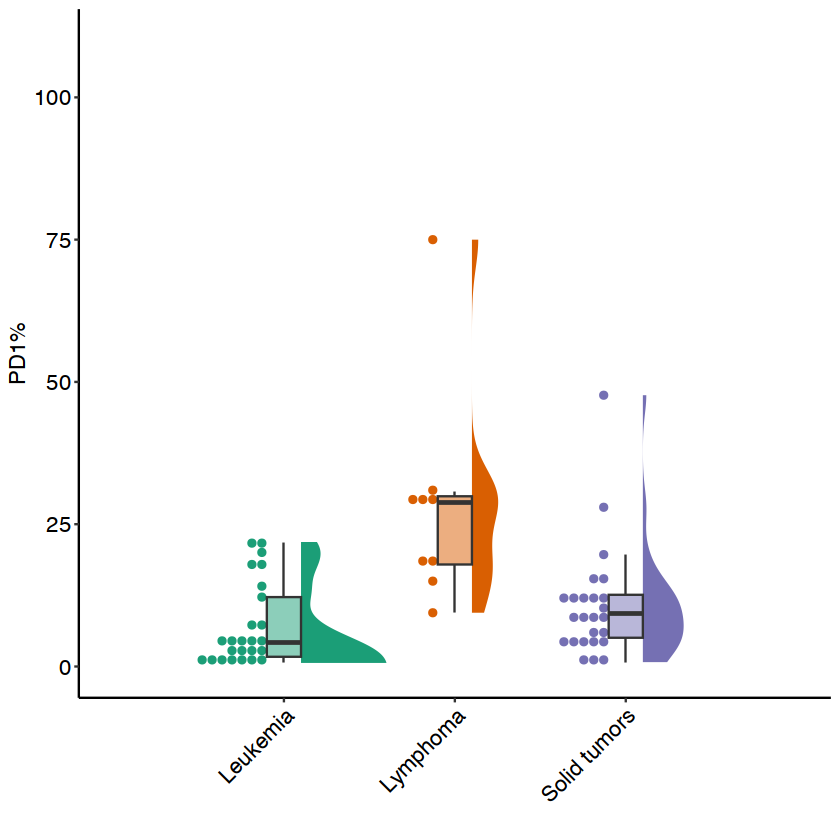

In [67]:
p3

In [68]:
tapply(pbmc_01$`PD1%`, pbmc_01$cancergroup, summary)

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.6279  1.7083  4.2779  7.2600 12.1951 21.8750       2 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.444  17.924  28.842  28.321  29.909  75.000 

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  5.0496  9.3715 10.7284 12.5997 47.6662 


In [69]:
table(pbmc_01$Disease_type)


   ALL    AML   ARMS     BL    CML  DLBCL   ERMS    EWS     HB     HD HR ALL 
    13      5      1      3      2      2      3      5      1      2      7 
 MS NB     NB     OS  PMBCL    RMS  WILMS 
     1      2      8      2      3      1 

In [70]:
pbmc_01[ pbmc_01$Disease_type == "OS", c("PD1%", "LAG3%","sample_id")]

,PD1%,LAG3%,sample_id
,<dbl>,<dbl>,<chr>
443,5.422222,1.600000,CHP_348_01
513,8.075532,16.512656,CHP_362_01
523,12.567399,5.060141,CHP_364_01
746,12.803738,10.046729,CHP_408_01
353,4.636849,2.749282,CHP_330_01
653,47.666254,37.050805,CHP_390_01
668,19.665072,7.416268,CHP_393_01
866,15.575304,4.069224,CHP_432_01


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


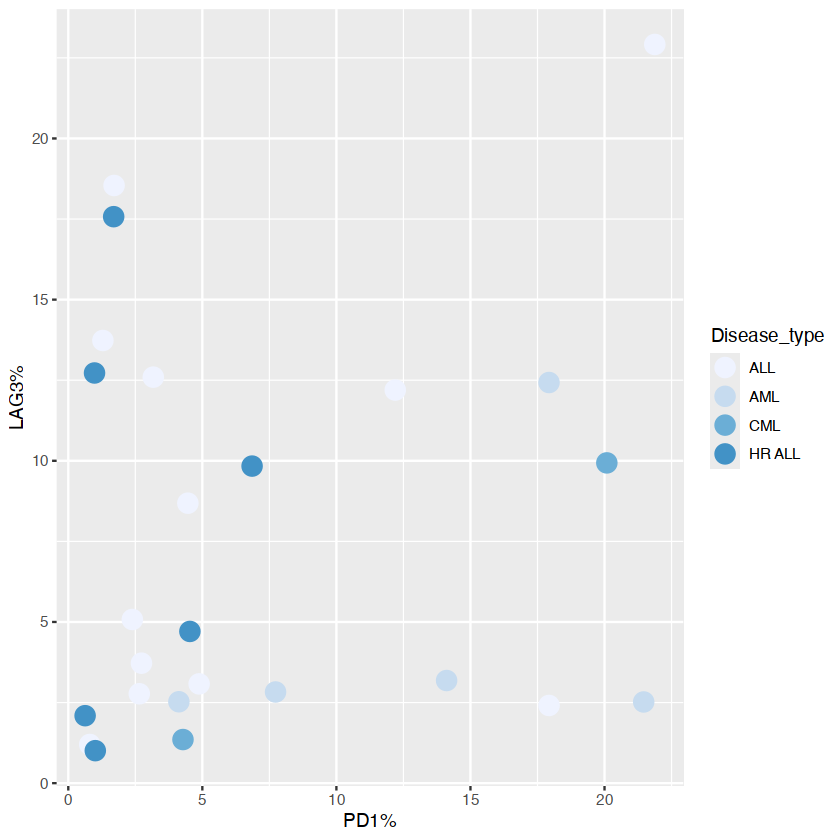

In [71]:
ggplot(pbmc_01[ pbmc_01$cancergroup == "Leukemia",], aes(x = `PD1%`, y = `LAG3%`, color = Disease_type)) + geom_point(size = 5) + scale_colour_manual(values = cohort_col)

In [72]:
tapply(pbmc_01$`PD1%`, pbmc_01$Disease_type, median, na.rm = T)

ALL        AML       ARMS         BL        CML      DLBCL       ERMS 
 2.9502935 14.1099855  5.0495942 30.6706114 12.1821362 21.9209103  9.4736842 
       EWS         HB         HD     HR ALL      MS NB         NB         OS 
 7.8893019  3.8116592 24.5206974  1.3503523  3.6322361  3.3709865 12.6855689 
     PMBCL        RMS      WILMS 
13.6841599 12.5996810  0.7636502

In [73]:
tapply(pbmc_01$`LAG3%`, pbmc_01$Disease_type, median, na.rm = T)

ALL        AML       ARMS         BL        CML      DLBCL       ERMS 
 6.8812994  2.8284098 10.9558161 25.0000000  5.6440194  8.4342296  7.4145535 
       EWS         HB         HD     HR ALL      MS NB         NB         OS 
 8.5321764  0.3736921 13.0491659  7.2714774  1.2485812  2.8512439  6.2382045 
     PMBCL        RMS      WILMS 
14.2156863  7.0227082  0.5345552

In [74]:
mytest <- "PD1%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.001603698

[1] 0.0008445937

[1] 0.03561137

In [75]:
mytest <- "PD1%"
mypval4 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval6 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [76]:
mypval4
mypval5
mypval6

[1] 0.001603698

[1] 0.0008445937

[1] 0.03561137

In [77]:
mypval4 <- round_and_format(mypval4)
mypval5 <- round_and_format(mypval5)
mypval6 <- round_and_format(mypval6)

In [78]:
p3_stat <- p3 + geom_signif(
    y_position = c(80, 90, 100), xmin = c(1,2,1), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval5), paste0("p = ",mypval4), paste0("p = ",mypval6) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("PD1%") ))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


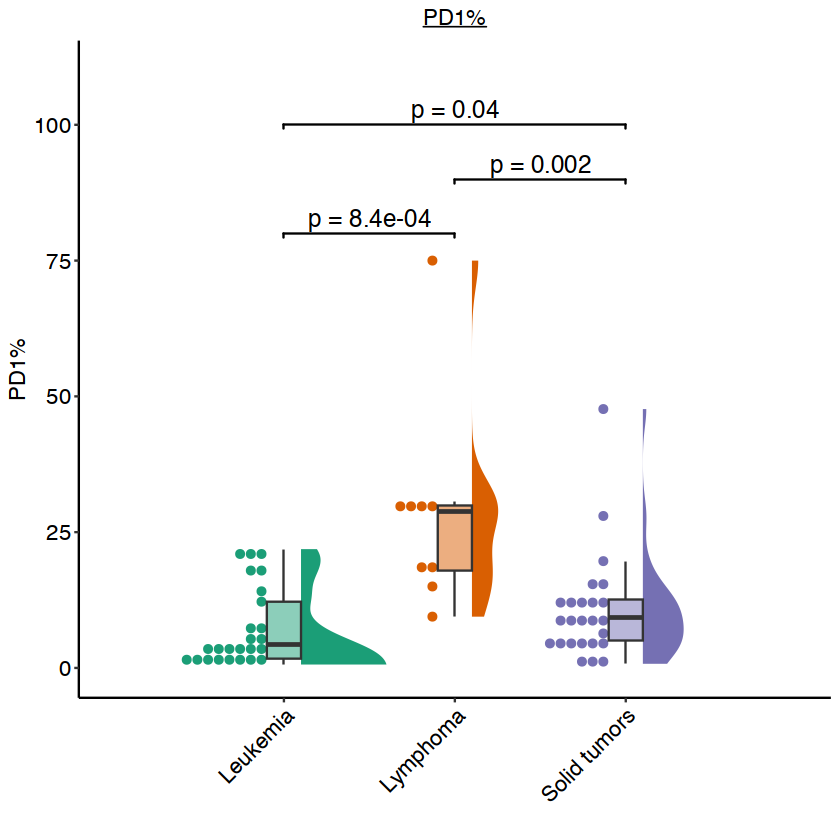

In [79]:
p3_stat

In [80]:
# pdf(paste0(plotpath, "rainclouds_PD1_X01.pdf"), width = 4, height = 6)
# p3_stat
# dev.off()

LAG3

In [81]:
p3_1 <- baseraincloud_plot.fx(pbmc_01, "`LAG3%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = NA) 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


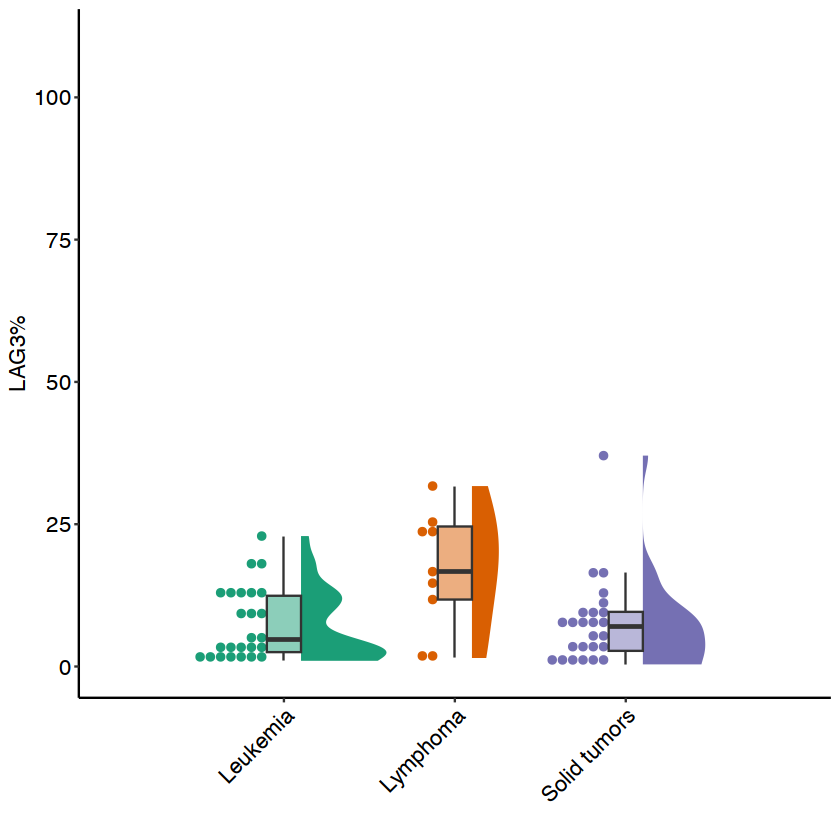

In [82]:
p3_1

In [83]:
mytest <- "LAG3%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.006451857

[1] 0.02263256

[1] 0.7102039

In [84]:
mytest <- "LAG3%"
mypval4_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_1 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

In [85]:
mypval4_1 <- round_and_format(mypval4_1)
mypval5_1 <- round_and_format(mypval5_1)

In [86]:
p3_stat_1 <- p3_1 + geom_signif(
    y_position = c(85, 100), xmin = c(1,2), xmax = c(2,3),
    annotation = c(paste0("p = ",mypval5_1), paste0("p = ",mypval4_1) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("LAG3%") ))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


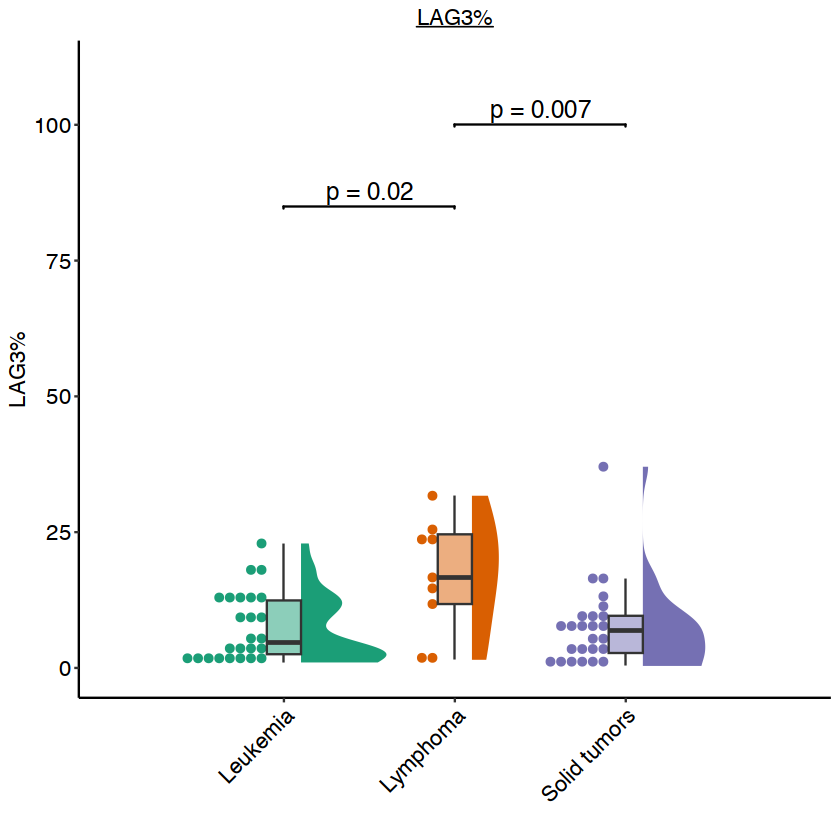

In [87]:
p3_stat_1

In [88]:
# pdf(paste0(plotpath, "rainclouds_LAG3_X01.pdf"), width = 4, height = 6)
# p3_stat_1
# dev.off()

TIM3

In [89]:
p3_2 <- baseraincloud_plot.fx(pbmc_01, "`TIM3%`", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 1, binwidth. = NA) 

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


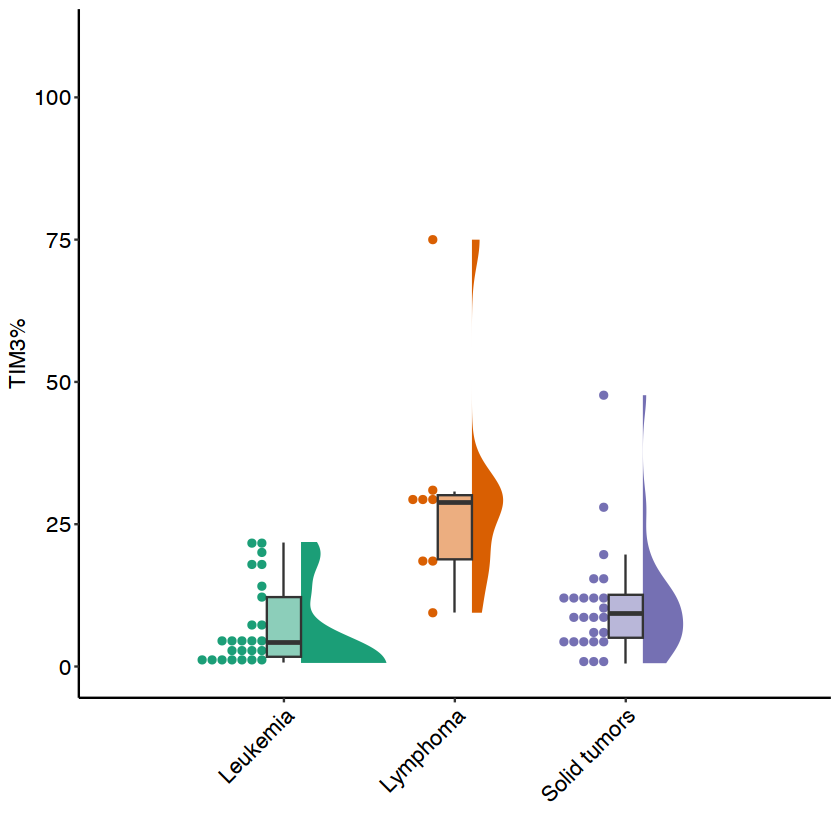

In [90]:
p3_2

In [91]:
mytest <- "TIM3%"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

[1] 0.0007610113

[1] 0.001273106

[1] 0.03561137

In [92]:
mytest <- "TIM3%"
mypval4_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval5_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
mypval6_2 <- ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value

In [93]:
mypval4_2 <- round_and_format(mypval4_2)
mypval5_2 <- round_and_format(mypval5_2)
mypval6_2 <- round_and_format(mypval6_2)

In [94]:
p3_stat_2 <- p3_2 + geom_signif(
    y_position = c(78, 88,105), xmin = c(1,2,1), xmax = c(2,3,3),
    annotation = c(paste0("p = ",mypval5_2), paste0("p = ",mypval4_2), paste0("p = ",mypval6_2) ), tip_length = 0.01, textsize = 5
  ) + ggtitle(expression(underline("TIM3%") ))

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”


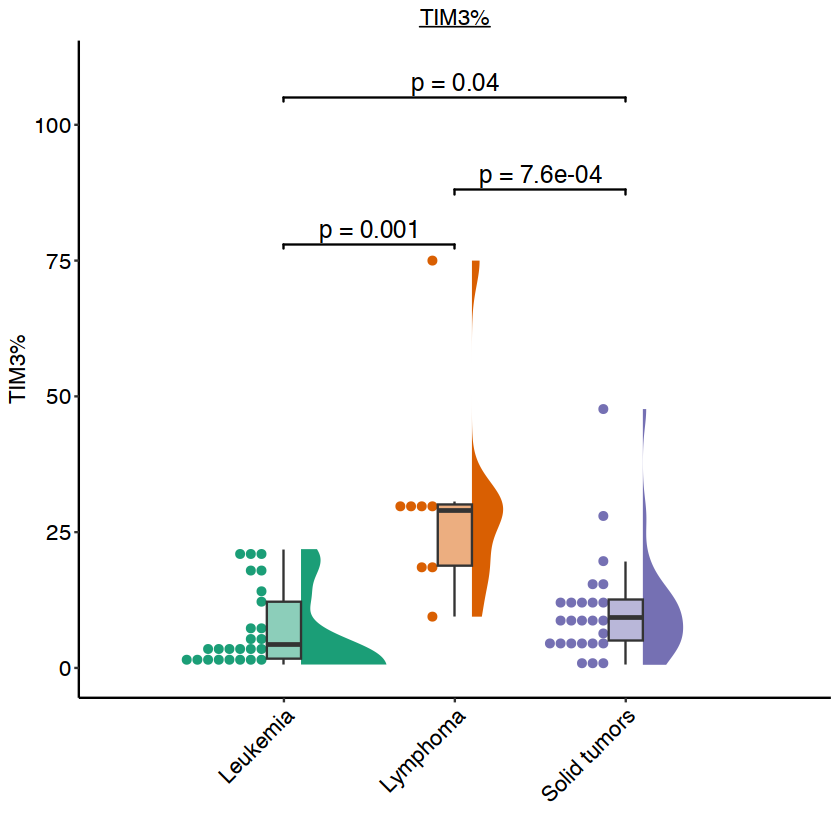

In [95]:
p3_stat_2

In [96]:
# pdf(paste0(plotpath, "rainclouds_TIM3_X01.pdf"), width = 4, height = 6)
# p3_stat_2
# dev.off()

TCR

In [97]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc_01 <- pbmc[pbmc$cycle == "X01",]
pbmc_01 <- pbmc_01[ !is.na(pbmc_01$TRB),]

In [98]:
p4 <- baseraincloud_plot.fx(pbmc_01, "log10shann", "cancergroup", "cancergroup", group_col, 
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 0.07) 
#scaledots = 0.8, justdots= 1.1, scaleslab= 0.8, justslab= -0.1 , adjustslab= 0.5, binwidth. = 0.1)  

In [99]:
mytest <- "log10shann"
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Leukemia")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value
ks.test(pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Solid tumors")], pbmc_01[[mytest]][ which(pbmc_01$cancergroup == "Lymphoma")])$p.value

[1] 0.5187846

[1] 0.8989843

[1] 0.8108015

In [100]:
mybreaks <- c(1, 10, 100, 500, 1000, 1500)
# mybreaks <- c(1, 10, 50, 100)

In [101]:
p4_1 <- p4 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("TCR diversity") )) +
labs(y = "TCR diversity (log10)")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


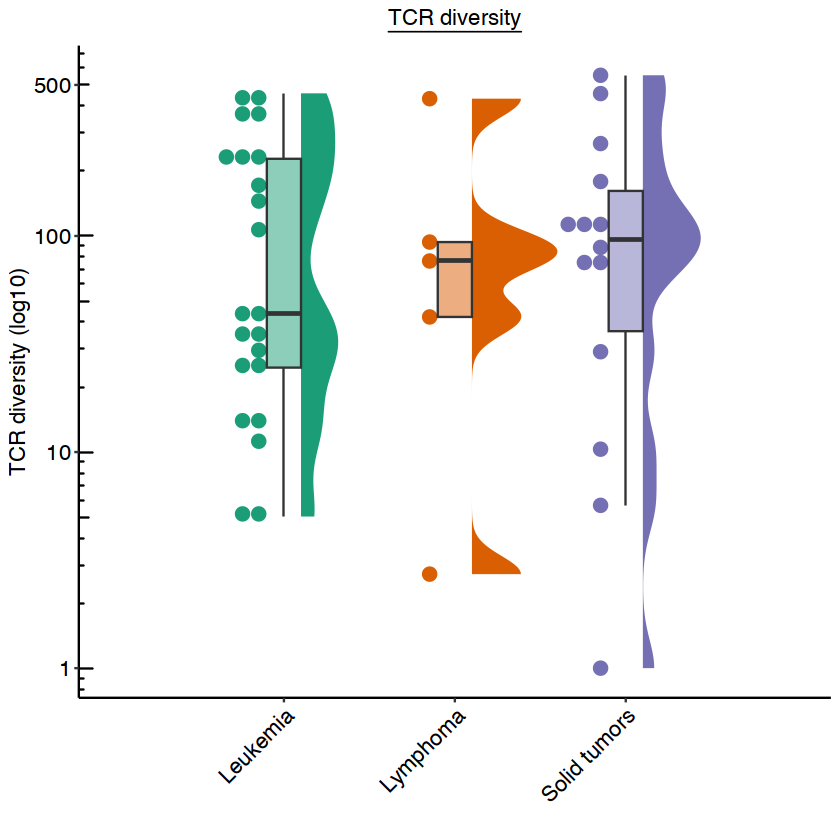

In [102]:
p4_1

In [103]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]
cfdna_01 <- cfdna[cfdna$cycle == "X01",]
cfdna_01 <- cfdna_01[ !is.na(cfdna_01$TRB),]

In [104]:
p5 <- baseraincloud_plot.fx(cfdna_01, "log10shann", "cancergroup", "cancergroup", group_col,
#scaledots = 0.7, justdots= 1.1, scaleslab= 0.7, justslab= -0.1 , adjustslab= 0.5, binwidth. = 0.04)  
scaledots = 0.5, justdots= 1.2, scaleslab= 0.5, justslab= -0.2 , adjustslab= 0.5, binwidth. = 0.04) 

In [105]:
mytest <- "log10shann"
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Solid tumors")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value
ks.test(cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Leukemia")], cfdna_01[[mytest]][ which(cfdna_01$cancergroup == "Lymphoma")])$p.value

[1] 0.9422676

[1] 0.1568585

[1] 0.2234618

In [106]:
# mybreaks <- c(1, 10, 100, 500, 1000, 1500)
mybreaks <- c(1, 10, 50, 100)

In [107]:
p5_1 <- p5 + annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks) + ggtitle(expression(underline("cfTCR diversity") )) + labs(y = "cfTCR diversity (log10)")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


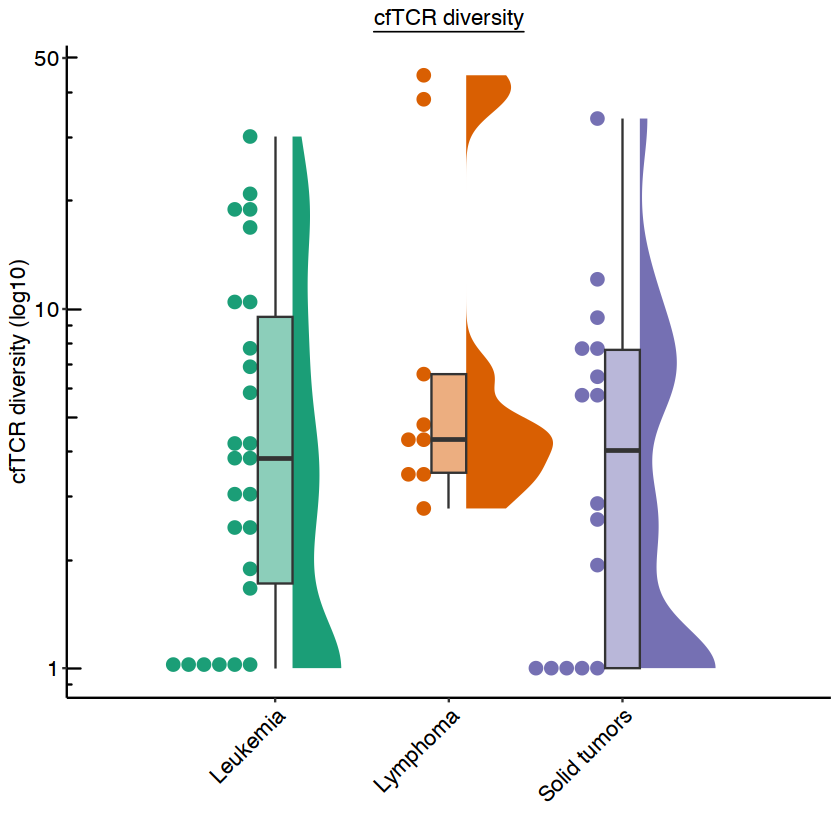

In [108]:
p5_1

Save plots

In [109]:
pdf(paste0(plotpath, "rainclouds_X01_checkpoints.pdf"), width = 12, height = 4)
plot_grid(p3_stat + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p3_stat_1 + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p3_stat_2 + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1, align = "hv", axis = "lr", labels = c("A", "B", "C"))   
dev.off()

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_dotsinterval()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`stat_slabinterval()`).”
Warning

pdf 
  2

In [110]:
pdf(paste0(plotpath, "rainclouds_X01_sigsubsets.pdf"), width = 12, height = 4)
plot_grid( 
p1_stat + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p0_stat+ theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
p2_stat +  theme(plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1, align = "hv", axis = "lr", labels = c("F", "G", "H"))
dev.off()

Warning message:
“The provided binwidth will cause dots to overflow the boundaries of the
geometry.
→ Set `binwidth = NA` to automatically determine a binwidth that ensures dots
  fit within the bounds,
→ OR set `overflow = "compress"` to automatically reduce the spacing between
  dots to ensure the dots fit within the bounds,
→ OR set `overflow = "keep"` to allow dots to overflow the bounds of the
  geometry without producing a warning.
ℹ For more information, see the documentation of the `binwidth` and `overflow`
  arguments of `?ggdist::geom_dots()` or the section on constraining dot sizes
  in vignette("dotsinterval") (`vignette(ggdist::dotsinterval)`).”


pdf 
  2

In [111]:
pdf(paste0(plotpath, "rainclouds_X01_othersubsets.pdf"), width = 8, height = 8)
plot_grid(p_scm, p_em, p4_1, p5_1, nrow = 2,  align = "hv", axis = "lr", labels = c("A", "B", "C", "D"))
dev.off()

pdf 
  2

## S plots across cancer entities

In [112]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

meta_div <- meta_div[ !is.na(meta_div$CD3), ]
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [113]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
pbmc <- pbmc[ pbmc$CD3 > 0,] # this removes all SR ALL cases
pbmc_01 <- pbmc[pbmc$cycle == "X01",]

In [114]:
table(pbmc_01$Disease_type)


  ALCL    ALL    AML   ARMS     BL    CML  DLBCL   ERMS    EWS     HB     HD 
     2     13      5      1      3      2      2      3      5      1      2 
HR ALL  MS NB     NB     OS  PMBCL    RMS  T-ALL  WILMS 
     7      1      2      8      2      3      2      1 

PD1

In [115]:
x01 <- pbmc_01

In [116]:
marker <- "PD1%"

In [117]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [118]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [119]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [120]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
9,HR ALL,1.3503523,Leukemia
5,ALL,2.9502935,Leukemia
7,CML,12.1821362,Leukemia
10,AML,14.1099855,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
19,PMBCL,13.6841599,Lymphoma
20,DLBCL,21.9209103,Lymphoma
11,HD,24.5206974,Lymphoma
15,BL,30.6706114,Lymphoma


Sort df

In [121]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [122]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [123]:
group_col

Leukemia            Lymphoma        Solid tumors T-cell malignancies 
          "#1B9E77"           "#D95F02"           "#7570B3"           "#2171b5" 
                LFS              Normal 
            "black"        "light grey"

In [124]:
Sp <- Splot.fx(sorted.df.lst, "`PD1%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.”


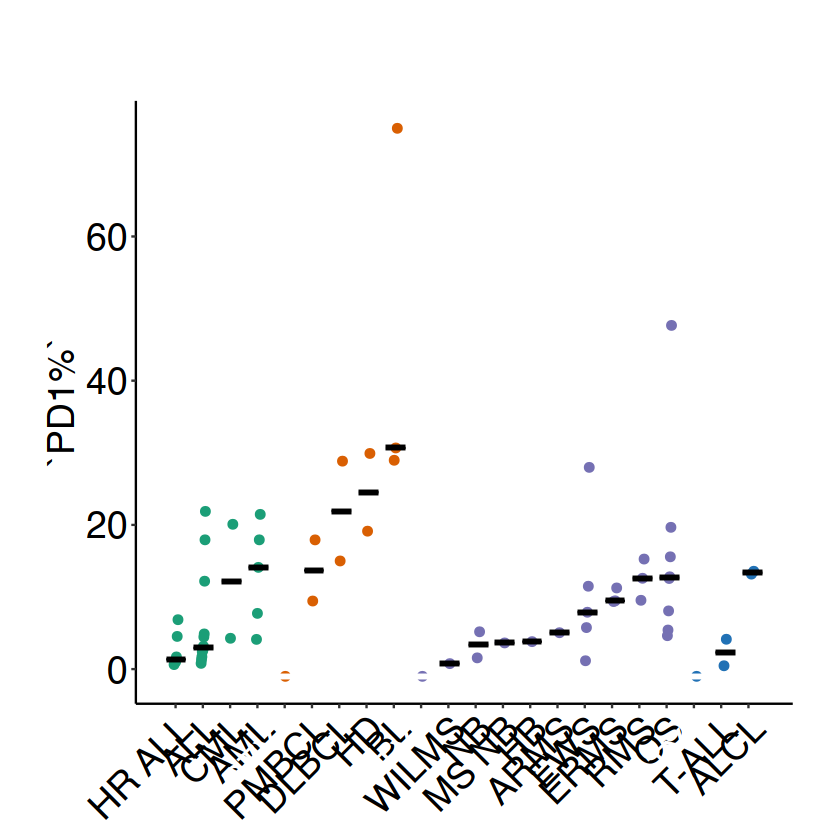

In [125]:
Sp

In [126]:
S_PD1 <- Sp + ylim(c(0, 100)) + labs(y = "PD1%") + ggtitle(expression(underline("PD1%") )) 

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


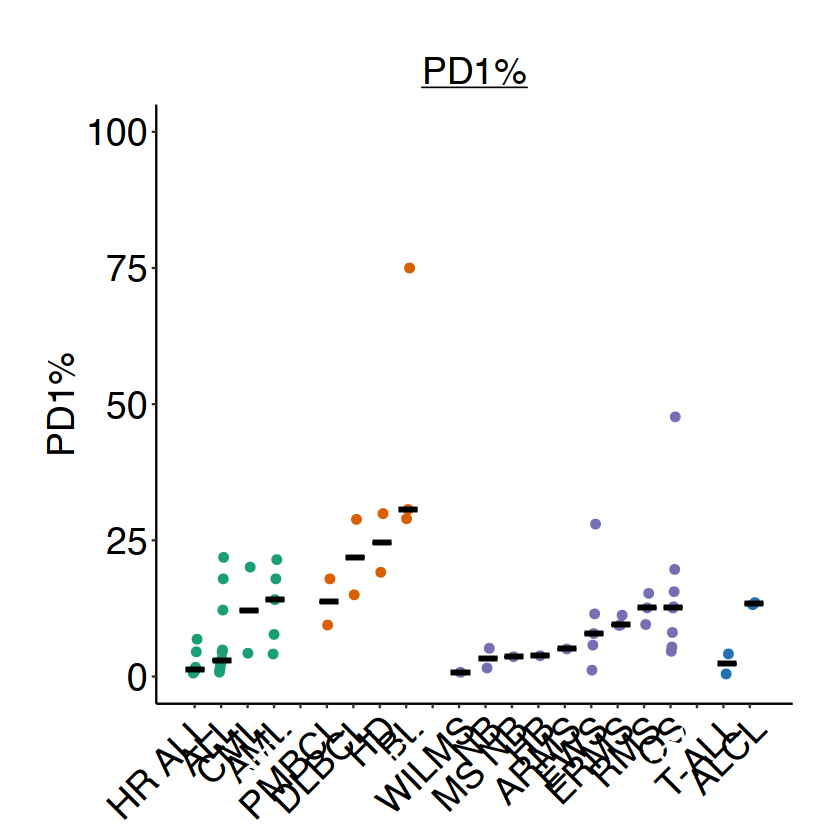

In [127]:
S_PD1

In [128]:
# pdf(paste0(plotpath, "Splot_PD1.pdf"), width = 10, height = 6)
# Sp + ylim(c(0, 100)) + labs(y = "PD1%")
# dev.off()

LAG3

In [129]:
x01 <- pbmc_01

In [130]:
marker <- "LAG3%"

In [131]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [132]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [133]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [134]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
10,AML,2.8284098,Leukemia
7,CML,5.6440194,Leukemia
5,ALL,6.8812994,Leukemia
9,HR ALL,7.2714774,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
20,DLBCL,8.4342296,Lymphoma
11,HD,13.0491659,Lymphoma
19,PMBCL,14.2156863,Lymphoma
15,BL,25.0000000,Lymphoma


Sort df

In [135]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [136]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [137]:
Sp <- Splot.fx(sorted.df.lst, "`LAG3%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [138]:
S_LAG3 <- Sp + ylim(c(0, 100)) + labs(y = "LAG3%") + ggtitle(expression(underline("LAG3%") )) 

In [139]:
# pdf(paste0(plotpath, "Splot_LAG3.pdf"), width = 10, height = 6)
# Sp + ylim(c(0, 100)) + labs(y = "LAG3%")
# dev.off()

TIM3

In [140]:
x01 <- pbmc_01

In [141]:
marker <- "TIM3%"

In [142]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [143]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [144]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [145]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
9,HR ALL,1.3503523,Leukemia
5,ALL,2.9502935,Leukemia
7,CML,12.1821362,Leukemia
10,AML,14.1099855,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
19,PMBCL,13.6841599,Lymphoma
11,HD,24.5206974,Lymphoma
20,DLBCL,28.8418206,Lymphoma
15,BL,30.6706114,Lymphoma


Sort df

In [146]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [147]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [148]:
Sp <- Splot.fx(sorted.df.lst, "`TIM3%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


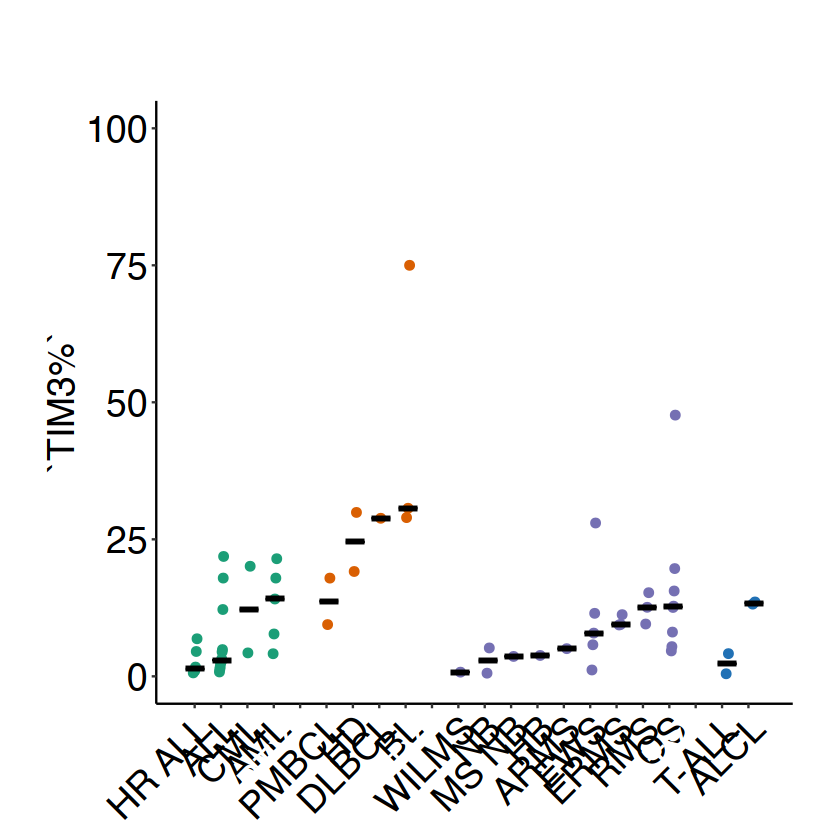

In [149]:
Sp + ylim(c(0, 100))

In [150]:
# pdf(paste0(plotpath, "Splot_TIM3.pdf"), width = 10, height = 6)
# Sp + ylim(c(0, 100)) + labs(y = "TIM3%")
# dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

CM%

In [151]:
x01 <- pbmc_01

In [152]:
marker <- "CM%"

In [153]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [154]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [155]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [156]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
9,HR ALL,1.3458401,Leukemia
5,ALL,2.1884770,Leukemia
10,AML,2.7655563,Leukemia
7,CML,16.2705272,Leukemia
1,EMPTY1,-1.0000000,Lymphoma
19,PMBCL,8.8994617,Lymphoma
20,DLBCL,10.1581043,Lymphoma
11,HD,23.5831773,Lymphoma
15,BL,32.3471400,Lymphoma


Sort df

In [157]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [158]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [159]:
Sp <- Splot.fx(sorted.df.lst, "`CM%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [160]:
S_CM <- Sp + ylim(c(0, 100)) + labs(y = "CM%") + ggtitle(expression(underline("CM%") )) 

Naïve

In [161]:
x01 <- pbmc_01

In [162]:
marker <- "Naïve%"

In [163]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [164]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [165]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [166]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
10,AML,5.188917,Leukemia
7,CML,8.664382,Leukemia
9,HR ALL,14.307004,Leukemia
5,ALL,29.032258,Leukemia
1,EMPTY1,-1.000000,Lymphoma
11,HD,16.400775,Lymphoma
19,PMBCL,17.772011,Lymphoma
15,BL,25.000000,Lymphoma
20,DLBCL,53.494943,Lymphoma


Sort df

In [167]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [168]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [169]:
Sp <- Splot.fx(sorted.df.lst, "`Naïve%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [170]:
S_naive <- Sp + ylim(c(0, 100)) + labs(y = "Naïve%") + ggtitle(expression(underline("Naïve%") )) 

TE

In [171]:
x01 <- pbmc_01

In [172]:
marker <- "TE%"

In [173]:
x01 <- rbind(NA, NA, NA, x01)

x01[1, "Disease_type"] <- "EMPTY1"
x01[2, "Disease_type"] <- "EMPTY2"
x01[3, "Disease_type"] <- "EMPTY3"

x01[1, marker] <- -1
x01[2, marker] <- -1
x01[3, marker] <- -1

x01[1, "cancergroup"] <- "Lymphoma"
x01[2, "cancergroup"] <- "Solid tumors"
x01[3, "cancergroup"] <- "T-cell malignancies"

In [174]:
mymed <- median.cohorts.fx(x01, marker, "Disease_type")

# include cancergroup column in mymed by matching group and Disease_type in mypatients
mymed$cancergroup <- x01$cancergroup[match(mymed$group, x01$Disease_type)]

In [175]:
# order by cnacergroup then by media
mymed <- mymed[order(mymed$cancergroup, mymed$median), ]

In [176]:
mymed

,group,median,cancergroup
,<chr>,<dbl>,<chr>
7,CML,49.180174,Leukemia
5,ALL,67.493797,Leukemia
10,AML,72.390572,Leukemia
9,HR ALL,77.480117,Leukemia
1,EMPTY1,-1.000000,Lymphoma
20,DLBCL,10.280782,Lymphoma
15,BL,25.000000,Lymphoma
11,HD,46.925708,Lymphoma
19,PMBCL,67.964245,Lymphoma


Sort df

In [177]:
sorted.df.lst <- sort.df.fx(x01, mymed, marker, "Disease_type")

Color dummy entries white

In [178]:
rmEMPTY <- rep("black", nrow(mymed))
rmEMPTY[which(mymed$group == "EMPTY1")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY2")] <- "white"
rmEMPTY[which(mymed$group == "EMPTY3")] <- "white"

In [179]:
Sp <- Splot.fx(sorted.df.lst, "`TE%`", "cancergroup", group_col, "")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [180]:
S_TE <- Sp + ylim(c(0, 100)) + labs(y = "TE%") + ggtitle(expression(underline("TE%") )) 

Save plots

In [181]:
pdf(paste0(plotpath, "Splot_PD1_LAG3.pdf"), width = 12, height = 4)
plot_grid(S_PD1 + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
S_LAG3 + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1,  align = "hv", axis = "lr", labels = c("D", "E"))
dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

In [182]:
pdf(paste0(plotpath, "Splot_TE_CM.pdf"), width = 12, height = 4)
plot_grid(S_CM + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
S_TE + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
nrow = 1,  align = "hv", axis = "lr", labels = c("I", "J"))
dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2

In [183]:
pdf(paste0(plotpath, "Splot_CM.pdf"), width = 6, height = 4)
plot_grid(S_CM + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
# S_TE + theme(axis.text = element_text(size = 13), axis.title = element_text(size = 13), plot.title = element_text(size = 13), plot.margin = unit(c(0, 0, 0, 0), "cm")), 
 labels = "I")
dev.off()

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_crossbar()`).”


pdf 
  2